In [1]:
### IMPORT LIBRARIES

import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
import pickle
import math

In [4]:
### DEFINE FUNCTIONS TO IMPORT JASON DATA

import json

def ParseJSON(fileName=None):

   data = []
   if fileName is None: raise ValueError("fileName cannot be None")
   with open(fileName) as fp:
        for line in fp:
            data.append(json.loads(line))


   return(data)


#### pass the data list and the token, get the list of the particular field back
def ProcessID(data,token):

   ID = []

   for item in data:

       ID.append(item[token])

   return(ID)

In [5]:
######## LOAD ONLY 1,2, OR 3

### 1. LOAD ORIGINAL DATA

#biz = pd.DataFrame(ParseJSON(fileName = 'Data/yelp_academic_dataset_business.json'))
#biz.shape
#data = biz[:]

In [ ]:
### 2. LOAD BINARY DATA - BIZ DATA with RESTO INDICATOR
#gdata = gl.load_sframe('businessdatabinary')
#biz = gdata.to_dataframe()
#data = biz[:]

In [5]:
### 3. LOAD BINARY DATA - BIZ DATA with RESTOS ONLY
#gdata = gl.load_sframe('restosdatabinary')
#biz = gdata.to_dataframe()
#data = biz[:]

In [77]:
###********* DO NOT RUN!!! ***********************
### ADD RESTO INDICATOR TO EACH RECORD
#resto = ["Restaurants","Bistros","Brasseries","Cafes","Delicatessen"]
#record=[]
#data.loc[:,"restoind"] = 0

In [78]:
### GREG CODE TO ADD RESTO INDICATOR
#for i in range(data.shape[0]):
#    record = data.iloc[i,:]
#    k=0
#    if not i % 1000:
#        print i
#    for cat in record['categories']:
#        if k > 0:
#            break
#        if (cat in resto):
#            k += 1 
#            data.iloc[i,15]=1

In [17]:
### CODE1 TO ADD RESTO INDICATOR
# categories = data['categories']

# for i in range(categories.shape[0]):
#    if not i % 1000:
#        print i
#    var = categories.iloc[i]
#    if len((set(var).intersection(set(resto))))>0: data.iloc[i,15] = 1

In [ ]:
### ALTERNATIVE CODE2 TO ADD RESTO INDICATOR
# categories = data['categories']

# ans = [True if len((set(var).intersection(set(resto)))>0 else False for var in categories]
# data['isResto'] = ans

In [ ]:
### DO NOT RUN. DATA ALREADY PROCESSED BEFOREHAND
### TO SAVE BUSINESS DATA IN PICKLE
#with open("bizdata.pkl", 'wb') as f:
#   pickle.dump(data, f)

In [2]:
### DO NOT RUN. RESTO DATA ALREADY CREATED BY THIS PREVIOUSLY
### TO LOAD BUSINESS DATA FROM PICKLE
#with open("bizdata.pkl", 'rb') as f:
#   data = pickle.load(f)

#print data.shape
#data.head(2)

In [47]:
### CREATE NEW DATAFRAME WITH RESTAURANT TYPES ONLY
#restodata = data.loc[data["restoind"]==1,]
#restodata = restodata.iloc[:,:14]

In [45]:
### SAVE RESTO DATA IN BINARY FORMAT USING GRAPHLAB FUNCTIONS
# gl.SFrame(restoreduced).save('restosdatabinary')

In [224]:
### TO SAVE RESTO DATA IN PICKLE
import pickle
with open("restodata3.pkl", 'wb') as f:
   pickle.dump(restodata, f)

In [3]:
### TO LOAD DATA FROM PICKLE
with open("restodata3.pkl", 'rb') as f:
   data = pickle.load(f)

print data.shape
data.head(2)

(25082, 17)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,PriceRange,LogReviewCnt,Outdoor
0,"{u'Take-out': True, u'Drive-Thru': False, u'Al...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{u'Tuesday': {u'close': u'21:00', u'open': u'1...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,1.0,1.386294,0.0
5,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",rankin,"414 Hawkins Ave\nrankin, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.413464,-79.880247,Emil's Lounge,[],True,20,5.0,PA,1.0,2.995732,0.0


In [4]:
### CREATE DUPLICATE OF DATA
restodata = data[:]

In [9]:
### CREATE MINI DATASET FOR TESTING CODE
minidata = restodata[:20]

In [317]:
#print restodata.keys()
#restodata.describe()

In [ ]:
#### *********** DO NOT RUN!!! DATA ALREADY CREATED PREVIOUSLY *****

In [ ]:
############### START FEATURE MODIFICATION AND ADDITION ###############

In [162]:
### GET PRICE RANGE OF RESTAURANTS

pricerange=[]
for i in range(len(restodata)):
    x = restodata.iloc[i].attributes.get("Price Range")
    pricerange.append(x)

print len(pricerange)
print sum([1 for x in pricerange if x!=None])

pricerange[:20]

25082
23415


[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, None, 2]

In [318]:
### ADD PRICE RANGE COLUMN
#restodata['PriceRange']=pricerange
#print restodata.keys()
#restodata.shape

In [164]:
### VIEW PRICE RANGE COUNTS
restodata['PriceRange'].value_counts()

2.0    11246
1.0    10499
3.0     1382
4.0      288
Name: PriceRange, dtype: int64

In [319]:
### ADD LOG OF REVIEW COUNTS COLUMN

#restodata['LogReviewCnt']= np.log(restodata['review_count'])

In [166]:
### GET OUTDOOR SEATING OF RESTAURANTS

outdoor = []
for i in range(len(restodata)):
    x = restodata.iloc[i].attributes.get("Outdoor Seating")
    if x == None:
        outdoor.append(x)
    else:
        outdoor.append(int(x))

print len(outdoor)
sum([1 for x in outdoor if x==1])

outdoor[:20]

25082


[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, None, 1]

In [320]:
### ADD OUTDOOR INDICATOR TO RESTO DATAFRAME
#restodata['Outdoor']=outdoor
#print restodata.keys()
#print restodata.shape
#restodata['Outdoor'].value_counts()

In [179]:
### CALCULATE NUMBER OF ROWS WITH NA
sum([1 for x in restodata["PriceRange"] if np.isnan(x)])

# Outdoor NA  2828
# stars          0
# PriceRange  1667
# LogReviewCnt   0

### CALCULATE NUMBER OF 3 FOR PriceRange 
sum([1 for x in restodata["PriceRange"] if x==3]) #1382

1382

In [181]:
### FIX OUTDOOR NAs

# CHANGE nan to 0 for Outdoor
nao = np.isnan(restodata['Outdoor'])
restodata.ix[nao,"Outdoor"] = 0

# DOUBLE CHECK CHANGE
sum([1 for x in restodata["Outdoor"] if np.isnan(x)])
sum([1 for x in restodata["Outdoor"] if x == 1])

In [187]:
### FIX PRICE RANGE NAs

# CHANGE nan to 3 for PriceRange
restodata.ix[np.isnan(restodata['PriceRange']),"PriceRange"] = 3

# DOUBLE CHECK CHANGE TO PriceRange
print sum([1 for x in restodata["PriceRange"] if np.isnan(x)])
sum([1 for x in restodata["PriceRange"] if x == 3])

0


3049

In [197]:
### COMBINE LOW RATINGS (2 OR LOWER) INTO ONE CLASS
restodata.loc[restodata['stars']<=2,"stars"] = 1

# DOUBLECHECK CHANGE
sum([1 for x in restodata["stars"] if x <= 2])

In [ ]:
############## END OF DATA MASSAGING GOR RESTO DATAFRAME #######

In [ ]:
############## EDA ################################

In [90]:
### GET UNIQUE RESTO CATEGORIES
catkeys=[]
for i in range(len(restodata)):
    catkeys = catkeys + restodata.iloc[i].categories
# minidata.apply(lambda x: pd.Series(x['info'].values(), index=data[''].keys()))
len(set(catkeys))

catkeys = set(catkeys)
len(catkeys)

298

In [ ]:
### VIEW SORTED RESTO CATEGORIES
set(catkeys)

In [316]:
### GET COUNT OF CATEGORIES
#restocatdict = dict(zip(catkeys,np.zeros(len(catkeys))))

#for i in range(len(restodata)):
#    for cat in restodata.iloc[i].categories:
#        restocatdict[cat] += 1 
        
#sorted(restocatdict.items(), key=lambda x: x[1])[270:]

In [315]:
### GET TABLE OF COUNTS FOR A COLUMN
#restodata['stars'].value_counts()

In [314]:
#restodata['PriceRange'].value_counts()

In [313]:
#restodata['LogReviewCnt'].value_counts()

In [66]:
### CHECK MISSING DATA
# data.apply(lambda x: sum(x.isnull()),axis=0)

In [51]:
### GET COLUMN NAMES
n = restodata.keys()
n

Index([u'attributes', u'business_id', u'categories', u'city', u'full_address',
       u'hours', u'latitude', u'longitude', u'name', u'neighborhoods', u'open',
       u'review_count', u'stars', u'state'],
      dtype='object')

In [188]:
### SUMMARIZE DATA
restodata.describe()

,latitude,longitude,review_count,stars,PriceRange,LogReviewCnt,Outdoor
count,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000,25082.000000
mean,38.250452,-93.123086,59.529663,3.482358,1.725939,3.078413,0.378917
std,6.048762,30.914435,145.558399,0.749558,0.714835,1.345747,0.485127
min,32.876619,-115.351900,3.000000,1.000000,1.000000,1.098612,0.000000
25%,33.565844,-112.273148,7.000000,3.000000,1.000000,1.945910,0.000000
50%,36.071293,-111.869248,19.000000,3.500000,2.000000,2.944439,0.000000
75%,43.014973,-80.044005,57.000000,4.000000,2.000000,4.043051,1.000000
max,56.036545,8.549249,5642.000000,5.000000,4.000000,8.637994,1.000000


In [ ]:
### GET UNIQUE VALUES OF A PARTICULAR COLUMN
#set(data["city"])

In [8]:
%pylab inline
# data.boxplot(column='review_count', by = 'stars')
# data.boxplot(column='review_count', by = 'stars')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
### HISTOGRAM
%pylab inline
#data['stars'].hist(bins=9)

Populating the interactive namespace from numpy and matplotlib


In [23]:
### ADD FEATURES
#data["elitecnt"] = data["elite"].apply(len)
#data["friendscnt"] = data["friends"].apply(len)
#data["totcompliments"] = [sum(x.values()) for x in data["compliments"]]
#data["totvotes"] = [sum(x.values()) for x in data["votes"]]
#data.head(2)

In [ ]:
########### START OF RESTO GRAPHLAB SET UP AND ANALYSIS #########

In [13]:
### REDUCE FEATURES AND CONVERT TO SFRAME
kdata = gl.SFrame(restodata[[12,14,15,16]])
kdata.head(2)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474117518.log


This non-commercial license of GraphLab Create for academic use is assigned to gregdomingo@gmail.com and will expire on September 09, 2017.


stars,PriceRange,LogReviewCnt,Outdoor
4.5,1.0,1.38629436112,0.0
5.0,1.0,2.99573227355,0.0


In [116]:
######## NO NEED TO RUN THIS MODEL AS GROUP DECIDED ON 3 FEATURES ####
### RUN K-MEANS MODEL USING 4 FEATURES

#kmeans_model = gl.kmeans.create(kdata, num_clusters=100, max_iterations=200)
#kmeans_model = gl.kmeans.create(kdata, num_clusters=25, max_iterations=200)

#kmeans_model.summary()

In [115]:
### VIEW CLUSTER RESULTS
#print kmeans_model["cluster_id"]
#km=kmeans_model["cluster_info"]
#km.print_rows(100)

In [ ]:
############ MAIN K MEANS ANALYSIS SECTION #########################

In [312]:
### CLUSTER ANALYSIS WITH 3 FEATURES WITHOUT OUTDOOR
kdatar = gl.SFrame(restodata[[12,14,15]])
#kdatar.head(2)
#k=100
#kmeans_model = gl.kmeans.create(kdatar, num_clusters=k, max_iterations=200)
#kmeans_model.summary()
#kmeans_model["cluster_id"]
#kclusters=kmeans_model["cluster_info"]
# kclusters.print_rows(k)

In [322]:
### TO SAVE KDATAR DATA IN PICKLE
import pickle

with open("kdatar.pkl", 'wb') as f:
   pickle.dump(kdatar.to_dataframe(), f)

In [2]:
### TO LOAD KDATAR FROM PICKLE
with open("kdatar.pkl", 'rb') as f:
   kdatar = gl.SFrame(pickle.load(f))

print kdatar.shape
kdatar.head(2)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1474491597.log


This non-commercial license of GraphLab Create for academic use is assigned to gregdomingo@gmail.com and will expire on September 09, 2017.
(25082, 3)


stars,PriceRange,LogReviewCnt
4.5,1.0,1.38629436112
5.0,1.0,2.99573227355


In [3]:
max(kdatar["LogReviewCnt"])

8.637993891561942

In [40]:
np.array(kdatar[kdatar.column_names()[0]])

array([ 4.5,  5. ,  4. , ...,  3. ,  3.5,  5. ])

In [3]:
### DEFINE FUNCTION TO PLOT CLUSTER CENTROIDS

def plotcluster(model,pointsize=15,k=0):
        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        %matplotlib inline
        if not isinstance(model,pd.DataFrame):
            model1 = model.to_dataframe()
        else:
            model1 = model

# PLOT           
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')       
        
#        ax.scatter(np.array(model1['stars']),
#                   np.array(model1['PriceRange']),
#                   np.array(model1['LRCHalf']),
        ax.scatter(np.array(model1[model1.columns[0]]),
                   np.array(model1[model1.columns[1]]),
                   np.array(model1[model1.columns[2]]), marker='o',
                   zdir='z', s=pointsize, c="b", depthshade=True)
    
        plt.title('Yelp Data') 
        plt.title(k,loc='left')
        # plt.title('Right Title', loc='right')
        ax.set_xlabel('Ratings')
        ax.set_ylabel('Price')
        ax.set_zlabel('LogReview')

        #plt.savefig('sampleFileName.png')
        fig.set_size_inches(8,8)
        plt.show()

In [131]:
kmeans_model['cluster_id']

row_id,cluster_id,distance
0,6,0.641201794147
1,6,1.42334198952
2,0,0.814492702484
3,4,0.566247344017
4,6,0.117537409067
5,0,0.775895416737
6,6,0.611476004124
7,1,0.801224768162
8,6,0.665613889694
9,4,0.468714296818



50


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 19726     |

| 1             | 7548      |

| 2             | 18557     |

| 3             | 25046     |

| 4             | 21191     |

| 5             | 2695      |

| 10            | 597       |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 2981                          |

| 2         | 1316                          |

| 3         | 850                           |

| 4         | 818                           |

| 5         | 722                           |

| 6         | 506                           |

| 7         | 446                           |

| 8         | 238                           |

| 9         | 168                           |

| 10        | 135                           |

| 11        | 79                            |

| 12        | 70                            |

| 13        | 59                            |

| 14        | 56                            |

| 15        | 57                            |

| 16        | 33                            |

| 17        | 39                            |

| 18        | 18                            |

| 19        | 23                            |

| 20        | 15                            |

| 21        | 6                             |

| 22        | 8                             |

| 23        | 13                            |

| 24        | 8                             |

| 25        | 11                            |

| 26        | 9                             |

| 27        | 5                             |

| 28        | 1                             |

| 29        | 3                             |

| 30        | 3                             |

| 31        | 1                             |

| 32        | 0                             |

+-----------+-------------------------------+

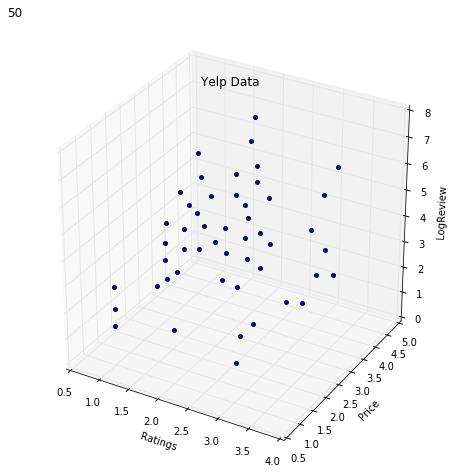

In [152]:
### RUN KMEANS GRID
distance = []
for i in range(50,51,10):
    raw_input()
    print i
    k=i
    kmeans_model = gl.kmeans.create(kdatar, num_clusters=k, max_iterations=200)
    distance = distance + [sum(kmeans_model.cluster_id['distance'])]
    
    pointsize = map(math.log,kmeans_model["cluster_id"].to_dataframe()["cluster_id"]
                    .value_counts())
    pointsize = [map(lambda x: (x-3)*10, pointsize)]
    plotcluster(kmeans_model["cluster_info"],pointsize,i)


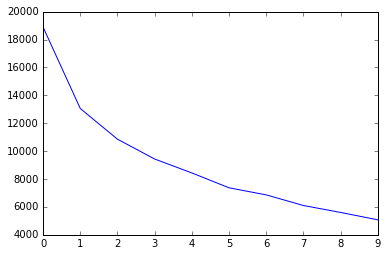

In [174]:

### PLOT TOTAL DISTANCE FROM CENTROIDS FOR EACH K FROM 5 TO 100

plt.plot(distance)


stars,PriceRange,LogReviewCnt
4.5,1.0,1.38629436112
5.0,1.0,2.99573227355
4.0,1.0,3.04452243772
3.5,1.0,2.07944154168
4.0,1.0,1.94591014906
4.5,1.0,4.06044301055
3.5,1.0,1.79175946923
3.0,2.0,1.94591014906
3.5,1.0,1.60943791243
2.5,1.0,2.19722457734


Batch size is larger than the input dataset. Switching to an exact Kmeans method.

Choosing initial cluster centers with Kmeans++.

+---------------+-----------+

| Center number | Row index |

+---------------+-----------+

| 0             | 11958     |

| 1             | 23451     |

| 2             | 5725      |

| 3             | 5025      |

| 4             | 2713      |

| 5             | 1400      |

| 10            | 5046      |

+---------------+-----------+

Starting kmeans model training.

Assigning points to initial cluster centers.

+-----------+-------------------------------+

| Iteration | Number of changed assignments |

+-----------+-------------------------------+

| 1         | 3453                          |

| 2         | 1638                          |

| 3         | 978                           |

| 4         | 691                           |

| 5         | 757                           |

| 6         | 527                           |

| 7         | 300                           |

| 8         | 261                           |

| 9         | 282                           |

| 10        | 334                           |

| 11        | 309                           |

| 12        | 282                           |

| 13        | 313                           |

| 14        | 331                           |

| 15        | 243                           |

| 16        | 109                           |

| 17        | 126                           |

| 18        | 86                            |

| 19        | 33                            |

| 20        | 27                            |

| 21        | 13                            |

| 22        | 10                            |

| 23        | 14                            |

| 24        | 2                             |

| 25        | 2                             |

| 26        | 0                             |

+-----------+-------------------------------+

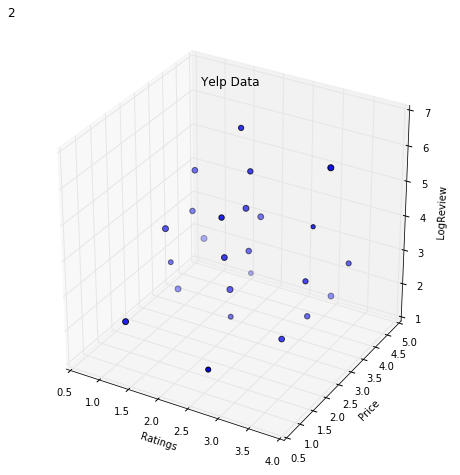

In [9]:
### RUN SPECIFIC K-MEANS RUN
k=25
kmeans_model = gl.kmeans.create(kdatar, num_clusters=k, max_iterations=200)
pointsize = map(math.log,kmeans_model["cluster_id"].to_dataframe()["cluster_id"].value_counts())
pointsize = [map(lambda x: (x-3)*8, pointsize)]
plotcluster(kmeans_model["cluster_info"],pointsize,2)

In [175]:
### PREDICT CLUSTER
new_resto = gl.SFrame({'stars': [4.5, 5, 4],
                  'PriceRange': [1,1,1],
                  'LogReviewCnt': [1.38629436,2.9957322,3.04452243772]})
kclusterid = kmeans_model.predict(new_resto, output_type='cluster_id')
print kclusterid

[34, 71, 5]


In [31]:
### SAVE KMEANS MODEL TO A FILE
kmeans_model.save('KMEANSModel25')

In [ ]:
### LOAD KMEANS MODEL
kmeans_model = graphlab.load_model('KMEANSModel25')

In [ ]:
########### END KMEANS ANALYSIS ##################################

In [ ]:
########### START DBSCAN ANALYSIS ##################################

In [4]:
### ADD NEW COLUMNs WITH RESIZED REVIEW COUNT 1) BY DIVIDING BY 2
###          AND 2) RESCALING TO ZERO TO ONE RANGE
kdatar['LRCHalf']=kdatar['LogReviewCnt']/2
kdatar['LRCZeroOne']=kdatar['LogReviewCnt']/max(kdatar['LogReviewCnt'])

In [16]:
### CREATE FUNCTION TO RUN MODEL AND REPORT SUMMARY AND CREATE CENTROID PLOT
def RunDBSModel(data,label,dist=0.2,neighbors=50):
    dbsmodel = gl.dbscan.create(data, features=None, distance='euclidean',
                    radius=dist, min_core_neighbors=neighbors, verbose=True)
    dbsmodel.summary()
    centroids = Centroids(data.to_dataframe(),dbsmodel)
    
    pointsize = map(math.sqrt,dbsmodel["cluster_id"].to_dataframe()["cluster_id"]
                    .value_counts())
#    pointsize = map(lambda x: (x-3)*10, pointsize)
    
    plotcluster(centroids,pointsize,label)
    
    print dbsmodel["cluster_id"].to_dataframe()["type"].value_counts()
    print dbsmodel["cluster_id"].to_dataframe()["cluster_id"].value_counts()
    
    return dbsmodel, centroid

In [17]:
### DEFINE CENTROIDS FUNCTION
# data is SFrame containing numeric data of features
def Centroids(data,dbsmodel):
        X = dbsmodel['cluster_id'].to_dataframe()
        # X.columns
        # Y=data.to_dataframe()
        Y=data
        Y['row_id'] = np.arange(Y.shape[0])
        Y = Y.merge(X,on='row_id',how='left')
        # Y.head(10)
        type = Y['type']
        Y.drop('type',inplace=True,axis=1)
        Y.drop('row_id',inplace=True,axis=1)
        centroids = Y.groupby('cluster_id').mean()
        return centroids

In [ ]:
### RUN DBS CLUSTER  (OLD VERSION)
distance = []
nclust =[]
for i in range(1,11,1):
    j=i/10.0
    raw_input()
    print j
    k=j
    dbsmodel = gl.dbscan.create(kdatar, features=None, distance='euclidean',
                 radius=k, min_core_neighbors=50, verbose=True)
    centroids = centroids(kdatar.to_dataframe(),dbsmodel)
    nclust = nclust + [centroids.shape[0]]
    plotcluster(centroids,k)


50


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 13.09s       |

| 2.4e+08 | 59.9856     | 18.63s       |

| 3.1e+08 | 79.9841     | 22.15s       |

| 3.5e+08 | 89.9841     | 24.34s       |

| 3.9e+08 | 99.9841     | 26.23s       |

| 3.9e+08 | 100         | 26.31s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 96920                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.3
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 128.2495
Number of clusters                       : 21

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


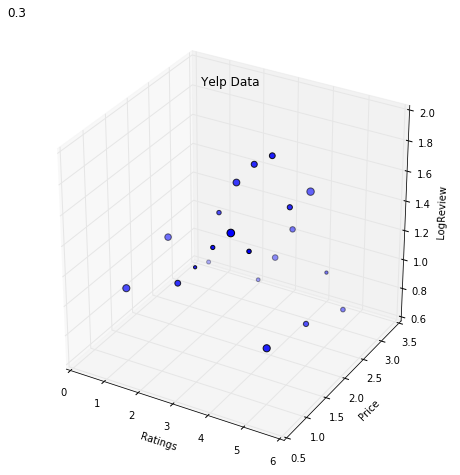

core        24251
noise         545
boundary      286
Name: type, dtype: int64
6.0     3320
8.0     3052
16.0    2594
0.0     2518
4.0     2090
20.0    1812
15.0    1319
12.0    1156
7.0     1136
14.0     996
3.0      867
1.0      745
10.0     717
5.0      457
19.0     386
9.0      377
18.0     307
17.0     262
2.0      204
13.0     116
11.0     106
Name: cluster_id, dtype: int64


In [18]:
### RUN DBS GRID (NEW VERSION)
dist = 0.3
neighbors = 50

### DISTANCE GRID SEARCH
# for i in range(1,11,1):
#    dist=i/10.0
#    raw_input()
#    print dist

### MIN NEIGHBORS GRID SEARCH
for neighbors in range(50,51,25):
    raw_input()
    print neighbors

    #lrc = 'LogReviewCnt'
    lrc = 'LRCHalf'
    #lrc = 'LRCZeroOne'
    dbsmodel,centroids = RunDBSModel(kdatar['stars','PriceRange',lrc],dist,
                                     dist=dist,neighbors=neighbors)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 14.75s       |

| 2.4e+08 | 59.9856     | 19.06s       |

| 3.1e+08 | 79.9841     | 22.70s       |

| 3.1e+08 | 79.9841     | 24.53s       |

| 3.5e+08 | 89.9841     | 24.75s       |

| 3.9e+08 | 99.9841     | 26.20s       |

| 3.9e+08 | 100         | 26.22s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 92275                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.45
Min number of neighbors for core points  : 20
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 47.0388
Number of clusters                       : 132

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


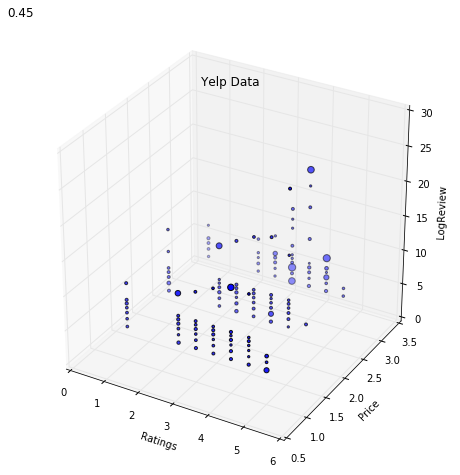

core        23211
noise        1543
boundary      328
Name: type, dtype: int64
75.0     2802
61.0     2588
4.0      1978
94.0     1938
39.0     1684
71.0     1228
97.0      928
116.0     719
5.0       671
6.0       653
43.0      383
36.0      203
2.0       181
103.0     167
55.0      144
105.0     135
72.0      123
29.0      119
115.0     117
96.0      117
22.0      115
31.0      111
83.0      109
42.0      103
77.0      100
28.0      100
107.0      97
80.0       97
34.0       96
15.0       95
         ... 
70.0       36
122.0      36
35.0       35
1.0        35
118.0      35
47.0       34
99.0       34
101.0      34
49.0       34
8.0        33
82.0       33
64.0       32
11.0       31
130.0      31
7.0        31
119.0      30
65.0       29
13.0       27
56.0       27
25.0       26
128.0      26
129.0      25
110.0      24
125.0      24
131.0      24
126.0      23
12.0       21
10.0       21
92.0       21
127.0      14
Name: cluster_id, dtype: int64


In [9]:
### RUN SPECIFIC DBS SCENARIO
dist = 0.45
neighbors = 20
lrc = 'LogReviewCnt'
kdatar2 = kdatar[:]
kdatar2['LogReviewCnt']= kdatar2['LogReviewCnt']*4
dbsmodel,centroids = RunDBSModel(kdatar2['stars','PriceRange',lrc],dist,
                                     dist=dist,neighbors=neighbors)


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.81s        |

| 2.4e+08 | 59.9856     | 14.02s       |

| 3.1e+08 | 79.9841     | 17.18s       |

| 3.1e+08 | 79.9841     | 19.45s       |

| 3.9e+08 | 99.9841     | 21.19s       |

| 3.9e+08 | 100         | 21.32s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 96996                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.5
Min number of neighbors for core points  : 100
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 186.1227
Number of clusters                       : 6

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


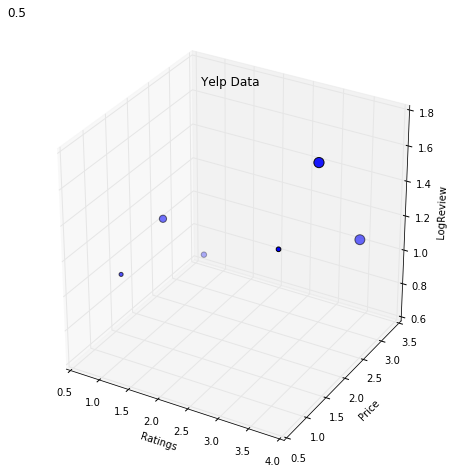

core        24255
boundary      437
noise         390
Name: type, dtype: int64
0.0    10762
4.0     9622
1.0     2709
5.0      870
2.0      463
3.0      266
Name: cluster_id, dtype: int64


In [31]:
### RUN SPECIFIC DBS SCENARIO
dist = 0.5
neighbors = 100
#lrc = 'LogReviewCnt'
lrc = 'LRCHalf'
#lrc = 'LRCZeroOne'
dbsmodel,centroids = RunDBSModel(kdatar['stars','PriceRange',lrc],dist,
                                     dist=dist,neighbors=neighbors)

In [37]:
### LOOK AT MODEL RESULTS
#dir(dbsmodel)
#dbsmodel.summary
#print dbsmodel["cluster_id"].print_rows(10)
dfdbs = dbsmodel["cluster_id"].to_dataframe()
sum([1 for z in dfdbs['cluster_id'] if z == 50])

# sum(dfdbs.ix[dfdbs.cluster_id==50,])

62

In [178]:
### GET MODEL CENTROIDS
# Input is pandas dataframe and model
centroids = Centroids(kdatar.to_dataframe(),dbsmodel)
centroids.tail()

,stars,PriceRange,LogReviewCnt
cluster_id,,,
46.0,4.0,2.0,3.900413
47.0,4.5,3.0,1.386294
48.0,3.0,3.0,1.098612
49.0,4.5,2.0,1.386294
50.0,4.0,3.0,5.394219


In [22]:
### CREATE PREDICT FUNCTION FOR DBS 
def dbscan_predict(centroids, new_resto):
      import numpy as np
        
      data = new_resto.values
      ans  = np.arange(data.shape[0])
      X    = centroids.values  
      for i in range(data.shape[0]):       
                dist = np.sum((X-data[i,:].reshape(1,-1))**2,axis=1)
                cluster_id = np.argmin(dist)
                ans[i] = cluster_id
      return(ans)          

In [297]:
# xx5=new_resto.to_dataframe().values[0]
#Centroids.values-xx5
#len(xx5)
#len(Centroids.values)
#Centroids.values-xx5
#.reshape(1,-1)

In [ ]:
np.sum((Centroids.values-xx5.reshape(1,-1))**2,axis=1)

In [285]:
### MAKE TEST RECORD FOR PREDICT DBS CLUSTER (no predict function for dbs)
new_resto = gl.SFrame({'stars': [4.5, 5, 4],
                  'PriceRange': [1,1,1],
                  'LogReviewCnt': [1.38629436,2.9957322,3.04452243772]})
#dclusterid = dbsmodel.predict(new_resto, output_type='cluster_id')
#print dclusterid

In [286]:
### PREDICT DBS CLUSTER FOR NEW OBSERVATION
dbscan_predict(Centroids,new_resto.to_dataframe())


array([41, 23, 40])

In [ ]:
### TEST OTHER MODELS USING DISTANCE = 0.3 AND FURTHER RESIZE OF REVIEW COUNTS

In [15]:
### RUN DBS MODEL WITH NEW FEATURE
dbsmodeldist3 = gl.dbscan.create(kdatar['stars','PriceRange','LogReviewCnt'], features=None, distance='euclidean',
                 radius=0.3, min_core_neighbors=50, verbose=True)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.90s        |

| 2.4e+08 | 59.9856     | 12.13s       |

| 3.1e+08 | 79.9841     | 16.06s       |

| 3.1e+08 | 79.9841     | 17.88s       |

| 3.1e+08 | 79.9841     | 18.15s       |

| 3.9e+08 | 99.9841     | 19.45s       |

| 3.9e+08 | 100         | 19.49s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 93656                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


In [ ]:
### SCENARIO: Distance = 0.5

dbsmodeldist3,centroids = RunDBSModel(kdatar['stars','PriceRange','LogReviewCnt'],'dist=0.5',
                                     dist=0.5,neighbors=100)


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.03s        |

| 2.4e+08 | 59.9856     | 11.65s       |

| 3.1e+08 | 79.9841     | 15.03s       |

| 3.1e+08 | 79.9841     | 16.93s       |

| 3.5e+08 | 89.9841     | 17.10s       |

| 3.9e+08 | 99.9841     | 18.48s       |

| 3.9e+08 | 100         | 18.53s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 95188                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.2
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 78.0113
Number of clusters                       : 21

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


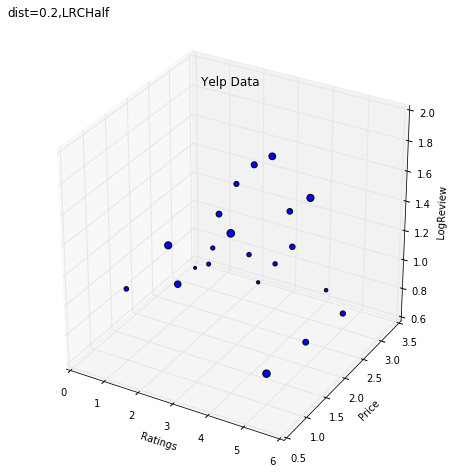

In [163]:
### SCENARIO: Distance = 0.20 LRCHalf

dbsmodellrchalf2, centroids = RunDBSModel(kdatar['stars','PriceRange','LRCHalf'],
                                         'dist=0.2,LRCHalf',dist=0.2)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 5.71s        |

| 2.4e+08 | 59.9856     | 10.75s       |

| 3.1e+08 | 79.9841     | 13.84s       |

| 3.5e+08 | 89.9841     | 15.91s       |

| 3.9e+08 | 99.9841     | 17.54s       |

| 3.9e+08 | 100         | 17.61s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 96920                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.3
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 107.5403
Number of clusters                       : 21

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


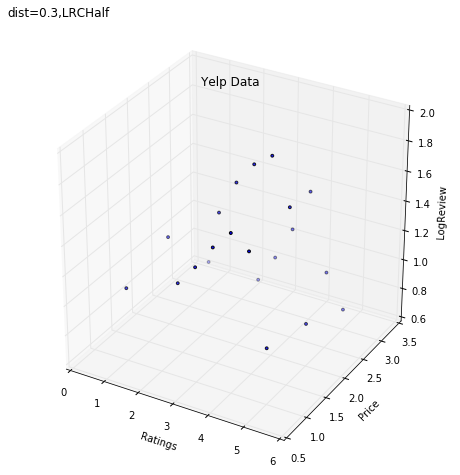

In [45]:
### SCENARIO: Distance = 0.3, LRCHalf

dbsmodellrchalf3 = RunDBSModel(kdatar['stars','PriceRange','LRCHalf'],'dist=0.3,LRCHalf',dist=0.3)


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 9.32s        |

| 2.4e+08 | 59.9856     | 14.66s       |

| 3.1e+08 | 79.9841     | 18.48s       |

| 3.5e+08 | 89.9841     | 20.92s       |

| 3.9e+08 | 99.9841     | 22.89s       |

| 3.9e+08 | 100         | 23.11s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99516                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.3
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 296.4802
Number of clusters                       : 23

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


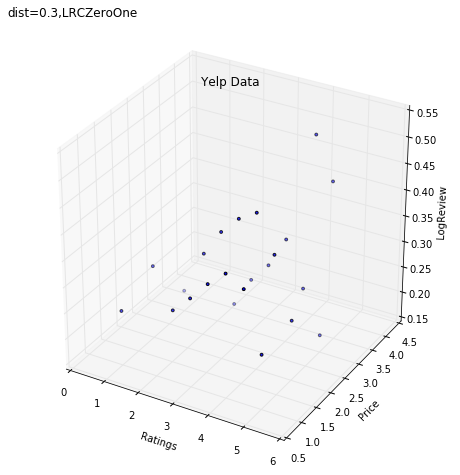

In [51]:
### SCENARIO: Distance = 0.3, LRCZeroOne

dbsmodellrczeroone = RunDBSModel(kdatar['stars','PriceRange','LRCZeroOne'],'dist=0.3,LRCZeroOne',dist=0.3)

Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 6.43s        |

| 2.4e+08 | 59.9856     | 11.89s       |

| 3.1e+08 | 79.9841     | 15.35s       |

| 3.5e+08 | 89.9841     | 17.45s       |

| 3.9e+08 | 99.9841     | 19.44s       |

| 3.9e+08 | 100         | 19.62s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99156                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


Class                                    : DBSCANModel

Schema
------
Number of examples                       : 25082
Number of feature columns                : 3
Max distance to a neighbor (radius)      : 0.2
Min number of neighbors for core points  : 50
Number of distance components            : 1

Training summary
----------------
Total training time (seconds)            : 220.3495
Number of clusters                       : 22

Accessible fields
-----------------
cluster_id                              : Cluster label for each row in the input dataset.


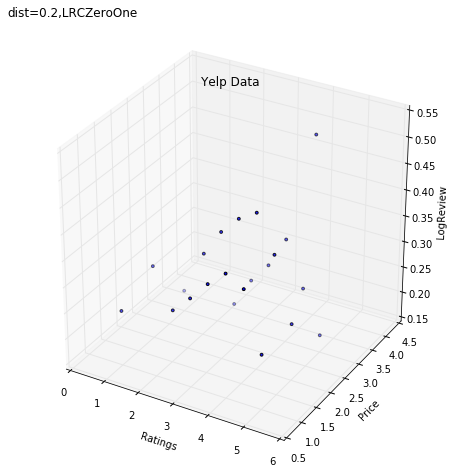

In [52]:
### SCENARIO: Distance = 0.2, LRCZeroOne

dbsmodellrczeroone2 = RunDBSModel(kdatar['stars','PriceRange','LRCZeroOne'],'dist=0.2,LRCZeroOne',dist=0.2)


0.1


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 6.39s        |

| 2.4e+08 | 59.9856     | 11.01s       |

| 3.1e+08 | 79.9841     | 14.52s       |

| 3.1e+08 | 79.9841     | 16.37s       |

| 3.5e+08 | 89.9841     | 16.55s       |

| 3.9e+08 | 99.9841     | 18.03s       |

| 3.9e+08 | 100         | 18.05s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 77504                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


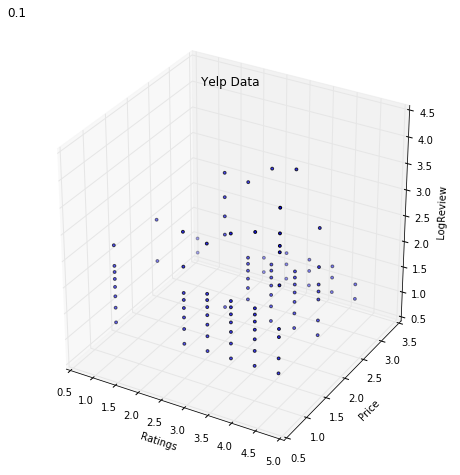


0.2


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 39.9888     | 7.92s        |

| 2.4e+08 | 59.9856     | 12.50s       |

| 3.1e+08 | 79.9841     | 15.72s       |

| 3.5e+08 | 89.9841     | 17.74s       |

| 3.9e+08 | 99.9841     | 19.14s       |

| 3.9e+08 | 100         | 19.17s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 89128                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


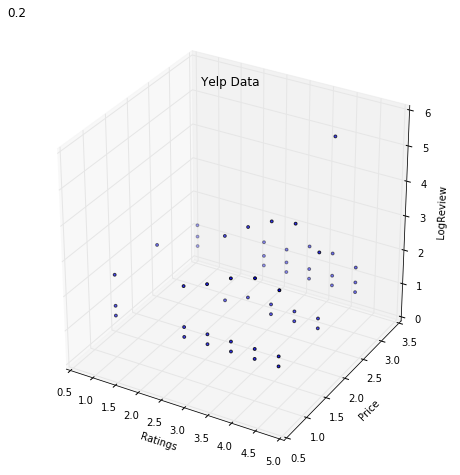


0.3


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.06s        |

| 2.4e+08 | 59.9856     | 12.18s       |

| 3.1e+08 | 79.9841     | 15.90s       |

| 3.1e+08 | 79.9841     | 17.90s       |

| 3.5e+08 | 89.9841     | 18.00s       |

| 3.9e+08 | 99.9841     | 19.62s       |

| 3.9e+08 | 100         | 19.66s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 93656                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


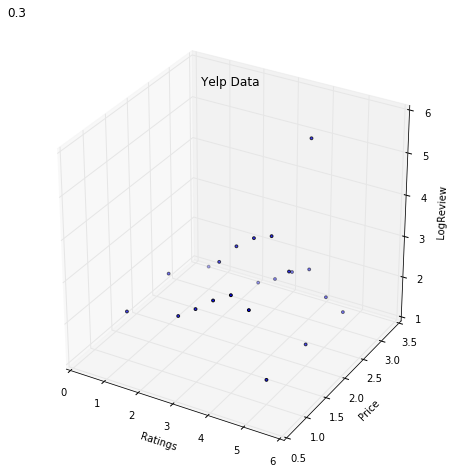


0.4


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.09s        |

| 2.4e+08 | 59.9856     | 12.70s       |

| 3.1e+08 | 79.9841     | 16.03s       |

| 3.1e+08 | 79.9841     | 17.83s       |

| 3.5e+08 | 89.9841     | 18.07s       |

| 3.9e+08 | 99.9841     | 19.45s       |

| 3.9e+08 | 100         | 19.50s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 95188                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


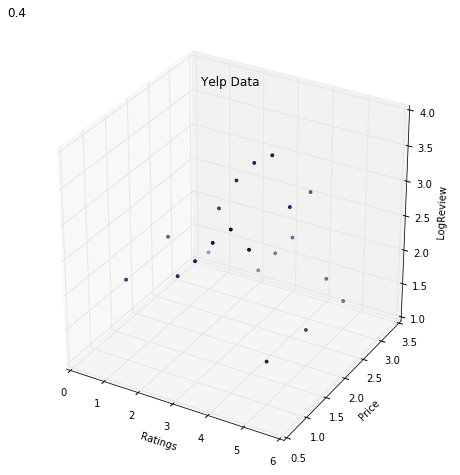


0.5


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.28s        |

| 2.4e+08 | 59.9856     | 11.98s       |

| 3.1e+08 | 79.9841     | 15.51s       |

| 3.1e+08 | 79.9841     | 17.46s       |

| 3.5e+08 | 89.9841     | 17.59s       |

| 3.9e+08 | 99.9841     | 18.96s       |

| 3.9e+08 | 100         | 19.03s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 96548                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


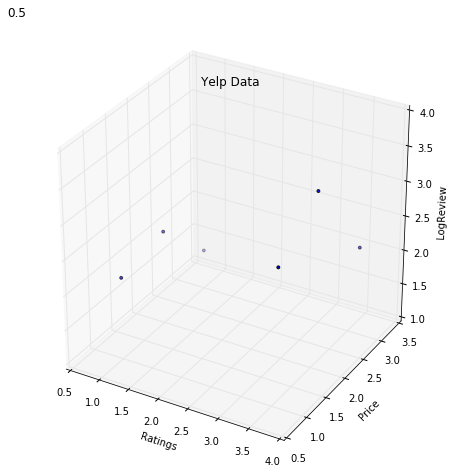


0.6


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.75s        |

| 2.4e+08 | 59.9856     | 12.80s       |

| 3.1e+08 | 79.9841     | 16.30s       |

| 3.5e+08 | 89.9841     | 18.43s       |

| 3.9e+08 | 99.9841     | 20.08s       |

| 3.9e+08 | 100         | 20.21s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 98324                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


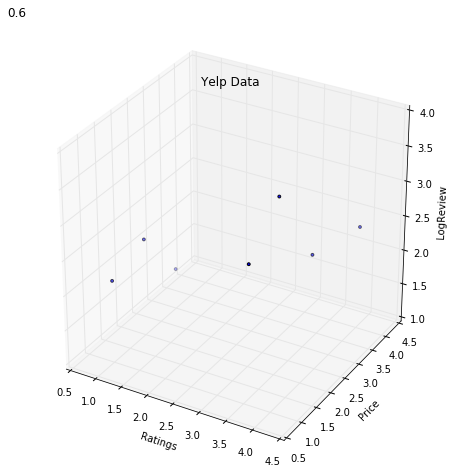


0.7


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.60s        |

| 2.4e+08 | 59.9856     | 14.72s       |

| 3.1e+08 | 79.9841     | 18.17s       |

| 3.5e+08 | 89.9841     | 20.38s       |

| 3.9e+08 | 99.9841     | 22.24s       |

| 3.9e+08 | 100         | 22.42s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 98828                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


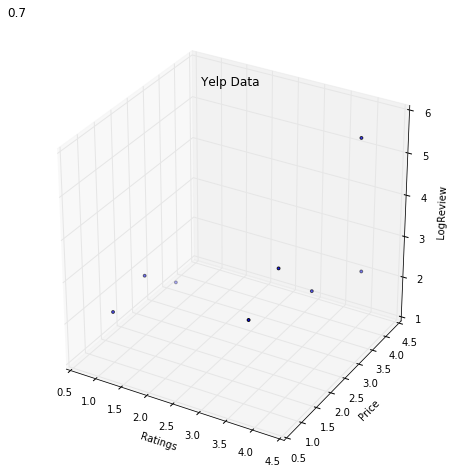


0.8


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 7.94s        |

| 2.4e+08 | 59.9856     | 13.69s       |

| 3.1e+08 | 79.9841     | 17.60s       |

| 3.5e+08 | 89.9841     | 19.85s       |

| 3.9e+08 | 99.9841     | 21.69s       |

| 3.9e+08 | 100         | 21.90s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99180                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


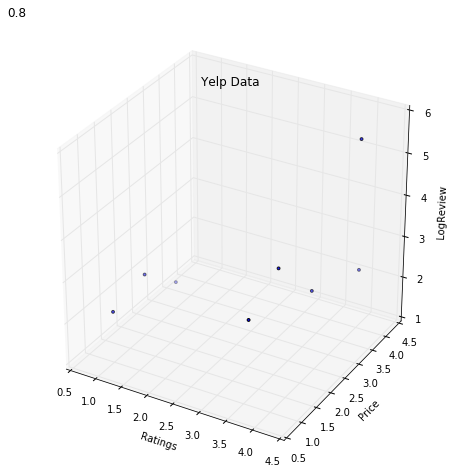


0.9


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 6.34s        |

| 2.4e+08 | 59.9856     | 13.92s       |

| 3.1e+08 | 79.9841     | 18.77s       |

| 3.5e+08 | 89.9841     | 21.06s       |

| 3.9e+08 | 99.9841     | 23.33s       |

| 3.9e+08 | 100         | 23.71s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99392                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


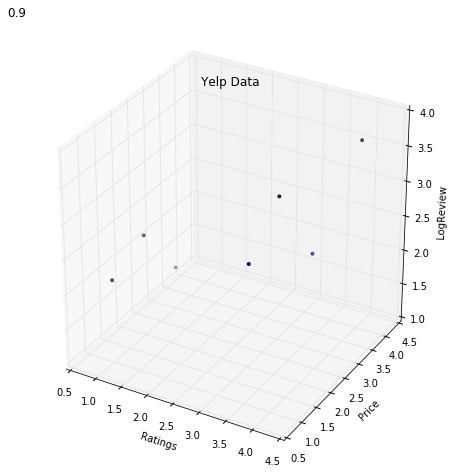


1.0


Starting brute force nearest neighbors model training.

Starting blockwise similarity graph construction.

max rows per data block: 8189

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 1.2e+08 | 29.992      | 8.52s        |

| 2.4e+08 | 59.9856     | 14.92s       |

| 3.1e+08 | 79.9841     | 18.24s       |

| 3.5e+08 | 89.9841     | 20.83s       |

| 3.9e+08 | 99.9841     | 23.52s       |

| 3.9e+08 | 100         | 23.82s       |

+---------+-------------+--------------+

[INFO] graphlab.toolkits.clustering.dbscan: Identifying noise points and core points.
[INFO] graphlab.toolkits.clustering.dbscan: Constructing the core point similarity graph.


+-----------------------------+

| Number of components merged |

+-----------------------------+

| 99796                       |

| 0                           |

+-----------------------------+

[INFO] graphlab.toolkits.clustering.dbscan: Processing boundary points.


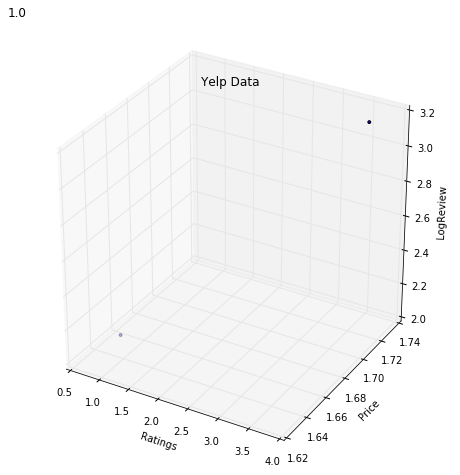

In [ ]:
# PLOT TOTAL DISTANCE FROM CENTROIDS FOR EACH K FROM 5 TO 100

plt.plot(nclust)


In [15]:
### SAVE CENTROIDS DATA FOR APP USE
import pickle
with open("centroids.pkl", 'wb') as f:
   pickle.dump(centroids, f)

In [14]:
centroids

,stars,PriceRange,LRCHalf
cluster_id,,,
0.0,4.0,1.0,1.636286
1.0,4.0,3.0,1.452306
2.0,5.0,1.0,0.952951
3.0,4.0,2.0,1.906292
4.0,3.5,2.0,1.820144
5.0,2.5,1.0,1.205844
6.0,3.0,3.0,0.934513
7.0,5.0,2.0,0.862079
8.0,4.5,2.0,1.606208


In [220]:
### SAVE BIZ DATA FOR MODEL
biz4 = restodata[[1,12,14,15]]
with open("biz4.pkl", 'wb') as f:
   pickle.dump(biz4, f)

In [121]:
### OPTIMAL CLUSTERS FOR DISTANCE SETTTING = 0.1 TO 1.0
nclust

[101, 51, 22, 21, 6, 7, 8, 8, 7, 2]

In [ ]:
################ END OF DBS CLUSTER ANALYSIS #######################

In [ ]:
########### ODDS AND ENDS #########################################

In [210]:
### GET COLUMN NAMES FOR SFRAMES
#kdata.column_names

In [139]:
### CHECK NUMBER OF MISSING DATA
minidata = kdata[:20]
na_outd = (np.isnan(minidata['Outdoor']))
len(na_outd)
na_outd[:10]

array([False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [125]:
### SOME USEFUL SEARCH LINES
#data['categories'].values
#any(el[1] == 'str_1' for el in t)
any(cat == 'Restaurant' for cat in data.categories[0])
[n for n, (i, s) in enumerate(t) if s == 'str_3']
#data.categories.values
# sum(data.loc[data['elitecnt']!=0,'elitecnt'].value_counts())
# data.loc[data['elitecnt']!=0,'elitecnt'].value_counts()

<generator object <genexpr> at 0x1626c30f0>

In [165]:
### AIKO FUNCTION TO GET ITEM INSIDE DATAFRAME
def ProcessID(data,token):

    ID = []

    for item in data:
        if token in item.keys():
            ID.append(item[token])
        else:
            ID.append({})

    return(ID)


In [49]:
### USING AIKO FUNCTION
#amb = ProcessID(minidata["categories"], 'Ambience')
#amb

In [50]:
### GET ELEMENTS INSIDE DICT
#minidata.iloc[0].attributes.get('Ambience')

In [89]:
# GET UNIQUE ATTRIBUTES
# attkeys=[]
# for i in range(len(data)):
#    attkeys = attkeys + data.loc[i].attributes.keys()
# set(attkeys)

In [110]:
### HISTOGRAM
# minidata['attributes'].hist(bins=25)

In [85]:
### Boxplot
# data.boxplot(column='review_count',return_type='axes')

In [86]:
### Boxplot with Group by
#data.boxplot(column='average_stars', by = 'elitecnt')

In [87]:
#data.boxplot(column='stars', by = 'review_count')

In [88]:
#data.boxplot(column='fans', by = 'average_stars')

In [ ]:
### CALCULATE NUMBER OF ROWS SATISFYING CONDITION
sum([1 for x in restodata["stars"] if x=None])

In [ ]:
### ACCESS ELEMENTS USING INDEX NUMBERS
data.iloc[3:5,2:4]

In [ ]:
### ACCESS ELEMENTS USING COLUMN NAMES
data.loc[0,"attributes"]
data.ix for mixed